<a href="https://colab.research.google.com/github/Ristoll/AIS_L4-6/blob/main/LR_4_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Naive Bayes ===
Confusion Matrix:
 [[30  0  0  0]
 [ 0 35  0  0]
 [ 0  0 31  1]
 [ 0  0  0 23]]
Accuracy: 0.9916666666666667
Recall: 0.9921875
Precision: 0.9895833333333334
F1 Score: 0.9907125970955758
ROC AUC: 1.0

=== SVM ===
Confusion Matrix:
 [[30  0  0  0]
 [ 0 35  0  0]
 [ 0  0 31  1]
 [ 0  0  0 23]]
Accuracy: 0.9916666666666667
Recall: 0.9921875
Precision: 0.9895833333333334
F1 Score: 0.9907125970955758
ROC AUC: 0.9999112215909091


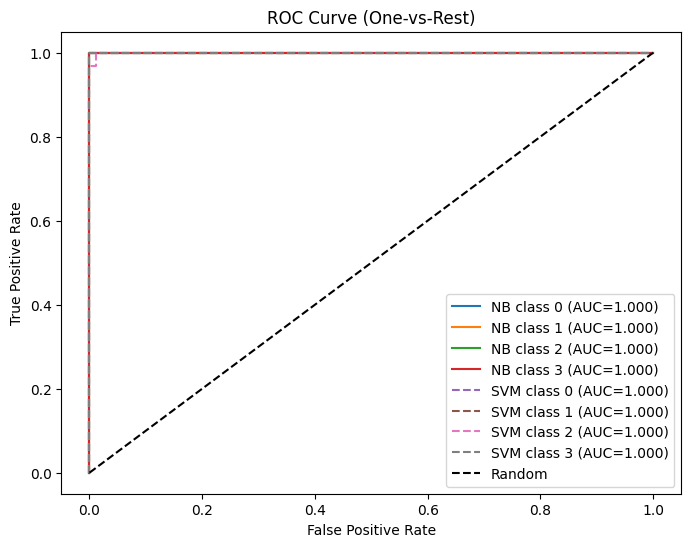

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    precision_score, f1_score, roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# 1. Завантаження даних
data = np.loadtxt('data_multivar_nb.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1].astype(int)

# 2. Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Наївний байєсівський класифікатор
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
y_prob_nb = nb_clf.predict_proba(X_test)

# 4. Машина опорних векторів (SVM)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)

# 5. Метрики
print("=== Naive Bayes ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("Precision:", precision_score(y_test, y_pred_nb, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='macro'))
print("ROC AUC:", roc_auc_score(y_test, y_prob_nb, multi_class='ovr', average='macro'))

print("\n=== SVM ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro'))

# 6. Побудова ROC-кривих для багатокласової задачі
# Бінаризація міток
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))

# ROC для Naive Bayes
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_nb[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_nb[:, i])
    plt.plot(fpr, tpr, label=f'NB class {classes[i]} (AUC={auc:.3f})')

# ROC для SVM
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_svm[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_svm[:, i])
    plt.plot(fpr, tpr, '--', label=f'SVM class {classes[i]} (AUC={auc:.3f})')

plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()



In [ ]:
from google.colab import files

# Відкриває вікно вибору файлу
uploaded = files.upload()


Saving data_multivar_nb.txt to data_multivar_nb.txt
